# Correlation Analysis: Real vs Synthetic Data

This notebook compares the correlation structures between real preprocessed data and synthetic data generated using GCopula augmentation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Set style for better visualizations
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Define data paths
base_path = '../data/processed/preprocessed/'
feature_names_path = os.path.join(base_path, 'feature_names.json')

# Load feature names
with open(feature_names_path, 'r') as f:
    feature_names = json.load(f)

print(f"Number of features: {len(feature_names)}")
print(f"Features: {feature_names}")

Number of features: 6
Features: ['hemo', 'sc', 'al', 'htn', 'age', 'dm']


In [2]:
# Load real preprocessed data (combining train and test)
X_train_real = pd.read_csv(os.path.join(base_path, 'X_train_preproc.csv'))
X_test_real = pd.read_csv(os.path.join(base_path, 'X_test_preproc.csv'))

# Combine train and test for comprehensive correlation analysis
X_real_combined = pd.concat([X_train_real, X_test_real], ignore_index=True)
X_real_combined.columns = feature_names

print(f"\nReal data shape: {X_real_combined.shape}")
print(f"Real data:\n{X_real_combined.head()}")


Real data shape: (400, 6)
Real data:
   hemo   sc        al  htn   age  dm
0  14.8  0.7  0.000000    0  73.0   0
1  13.2  1.3  0.000000    0  48.0   1
2  16.0  0.5 -0.234071    0  70.0   0
3  15.0  1.3  0.000000    1  37.0   0
4  15.5  1.2  0.000000    0  51.0   0


In [3]:
# Load synthetic data
X_synth = pd.read_csv('../data/synthetic/X_synth_3x_gcopula_preproc.csv')
X_synth.columns = feature_names

print(f"\nSynthetic data shape: {X_synth.shape}")
print(f"Synthetic data:\n{X_synth.head()}")


Synthetic data shape: (840, 6)
Synthetic data:
        hemo        sc   al  htn        age  dm
0  16.555747  1.200000  0.0    0  29.616009   0
1  14.400000  1.200000  0.0    0  38.970933   0
2  13.994302  0.700000  0.0    0  58.000000   0
3  12.934709  2.711383  2.0    1  56.000000   1
4  17.613127  0.700000  0.0    0  60.000000   0


## Correlation Matrix - Real Data

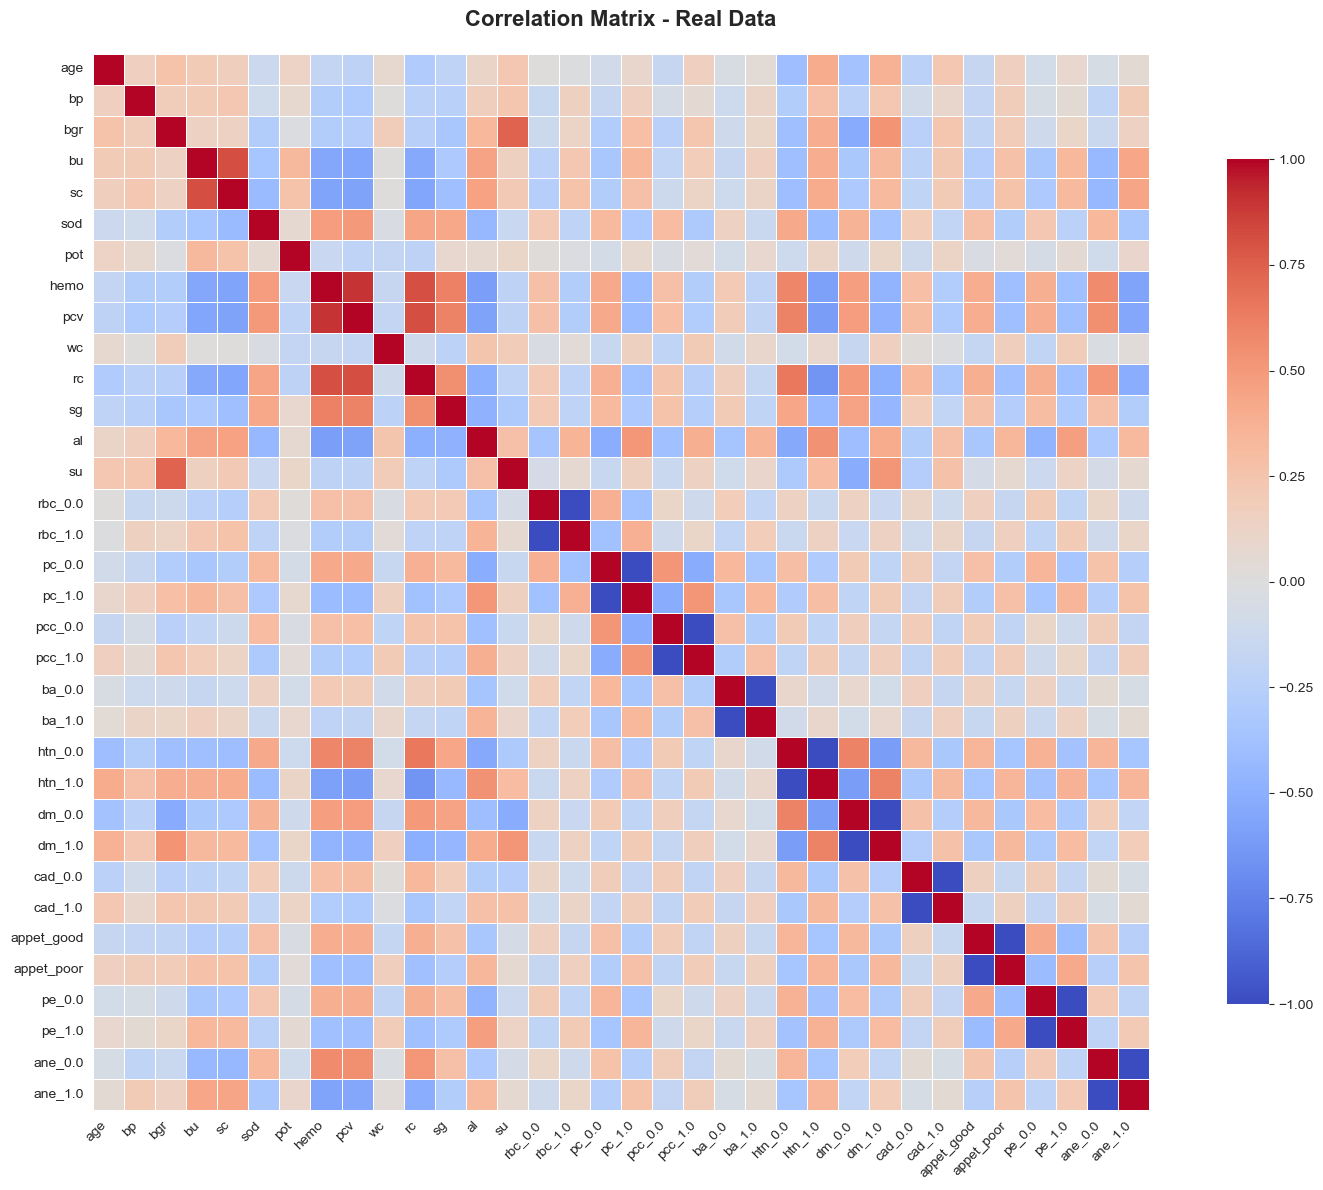

Real data correlation matrix shape: (34, 34)


In [10]:
# Calculate correlation matrices
corr_real = X_real_combined.corr()
corr_synth = X_synth.corr()

# Plot correlation matrix for real data
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_real, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Real Data', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Real data correlation matrix shape: {corr_real.shape}")

## Correlation Matrix - Synthetic Data (GCopula 3x)

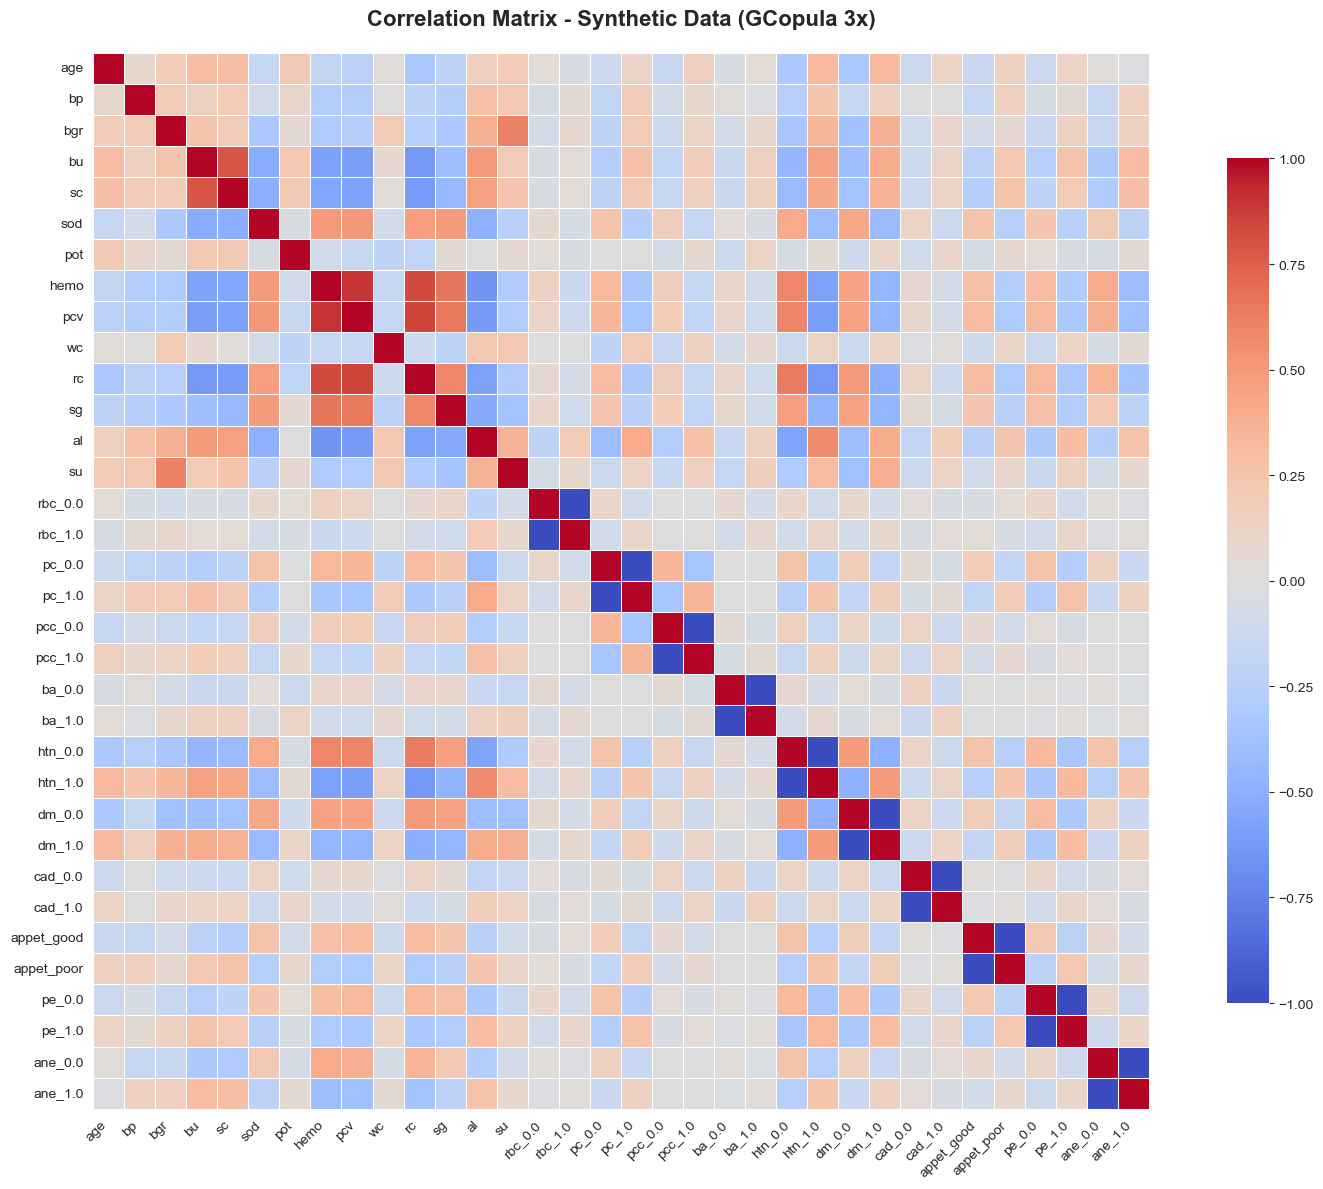

Synthetic data correlation matrix shape: (34, 34)


In [7]:
# Plot correlation matrix for synthetic data
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_synth, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Synthetic Data (GCopula 3x)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Synthetic data correlation matrix shape: {corr_synth.shape}")

## Difference in Correlation Matrices (Real - Synthetic)

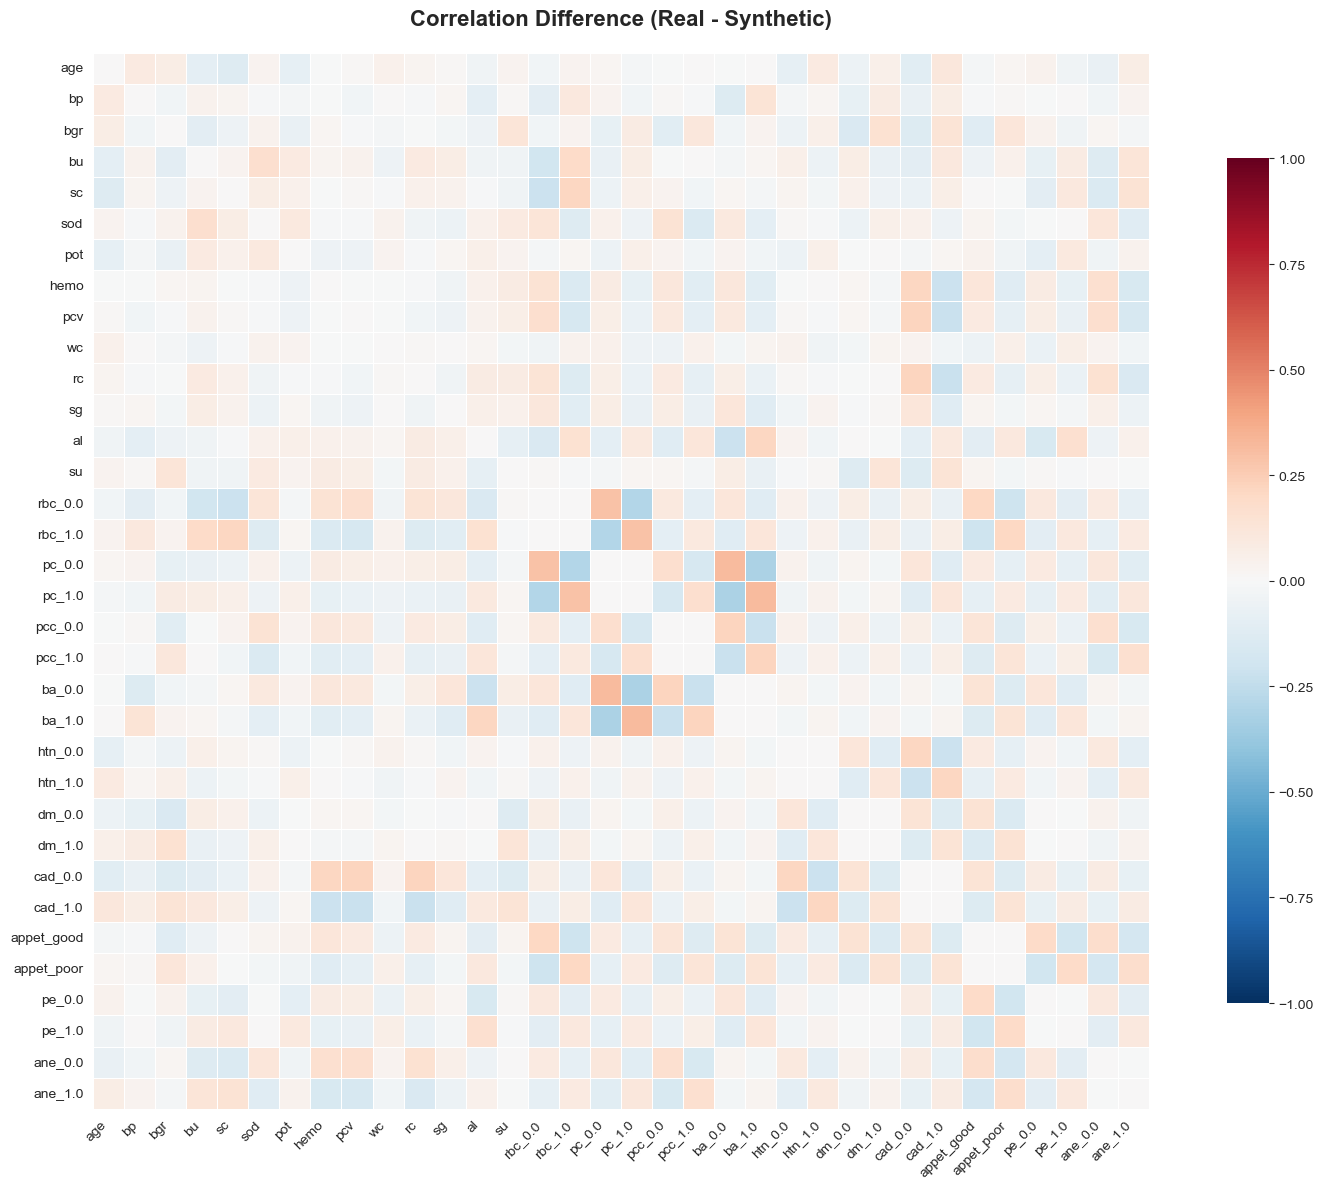

Mean absolute correlation difference: 0.0749
Max correlation difference: 0.3149
Min correlation difference: -0.3149


In [8]:
# Calculate and plot the difference
corr_diff = corr_real - corr_synth

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_diff, annot=False, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Correlation Difference (Real - Synthetic)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Mean absolute correlation difference: {np.abs(corr_diff).values.mean():.4f}")
print(f"Max correlation difference: {corr_diff.values.max():.4f}")
print(f"Min correlation difference: {corr_diff.values.min():.4f}")

## Statistical Comparison Summary

In [9]:
# Create summary statistics
summary_stats = {
    'Metric': ['Dataset Size', 'Number of Features', 'Mean Correlation', 'Std Dev Correlation', 'Max Correlation', 'Min Correlation'],
    'Real Data': [
        X_real_combined.shape[0],
        X_real_combined.shape[1],
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].mean():.4f}",
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].std():.4f}",
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].max():.4f}",
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].min():.4f}"
    ],
    'Synthetic Data': [
        X_synth.shape[0],
        X_synth.shape[1],
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].mean():.4f}",
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].std():.4f}",
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].max():.4f}",
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].min():.4f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('../results/correlation_analysis_summary.csv', index=False)
print("\nSummary saved to: ../results/correlation_analysis_summary.csv")

             Metric Real Data Synthetic Data
       Dataset Size       400            840
 Number of Features        34             34
   Mean Correlation   -0.0174        -0.0186
Std Dev Correlation    0.3218         0.2830
    Max Correlation    0.8985         0.9004
    Min Correlation   -1.0000        -1.0000

Summary saved to: ../results/correlation_analysis_summary.csv


## Correlation Analysis — New (Imputed Raw) vs Synthetic (GCopula)

This section compares the correlation structure using the canonical 6 clinical features from the **imputed raw** split files (`data/processed/splits/`) against the **generated synthetic** datasets (`data/synthetic/`).

In [4]:
# Load "new" real data (imputed raw split) and select canonical features
splits_path = '../data/processed/splits/'
X_train_imputed_raw = pd.read_csv(os.path.join(splits_path, 'X_train_imputed_raw.csv'))
X_test_imputed_raw = pd.read_csv(os.path.join(splits_path, 'X_test_imputed_raw.csv'))

canonical_features = feature_names  # expected: ['hemo','sc','al','htn','age','dm']
missing_cols = [c for c in canonical_features if c not in X_train_imputed_raw.columns]
if missing_cols:
    raise ValueError(f"Missing canonical columns in imputed-raw data: {missing_cols}")

# Combine train + test to get a more stable correlation estimate
X_new_real = pd.concat([X_train_imputed_raw, X_test_imputed_raw], ignore_index=True)
X_new_real = X_new_real[canonical_features].copy()

# Ensure numeric dtypes (drop rows that can't be coerced)
for col in canonical_features:
    X_new_real[col] = pd.to_numeric(X_new_real[col], errors='coerce')
X_new_real = X_new_real.dropna(subset=canonical_features)

print(f"New real (imputed raw) shape (after selecting canonical + dropping NaNs): {X_new_real.shape}")
print(X_new_real.head())

New real (imputed raw) shape (after selecting canonical + dropping NaNs): (398, 6)
   hemo   sc        al  htn   age   dm
0  14.8  0.7  0.000000  0.0  73.0  0.0
1  13.2  1.3  0.000000  0.0  48.0  1.0
2  16.0  0.5 -0.234071  0.0  70.0  0.0
3  15.0  1.3  0.000000  1.0  37.0  0.0
4  15.5  1.2  0.000000  0.0  51.0  0.0


Synthetic 1x shape (after dropping NaNs): (280, 6)
Synthetic 3x shape (after dropping NaNs): (840, 6)


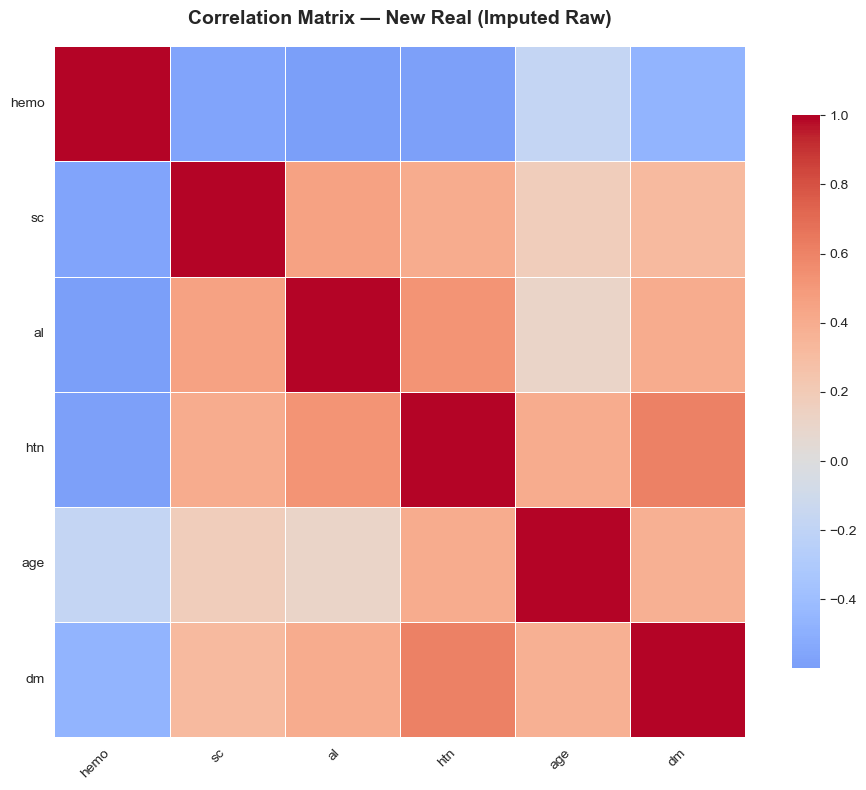

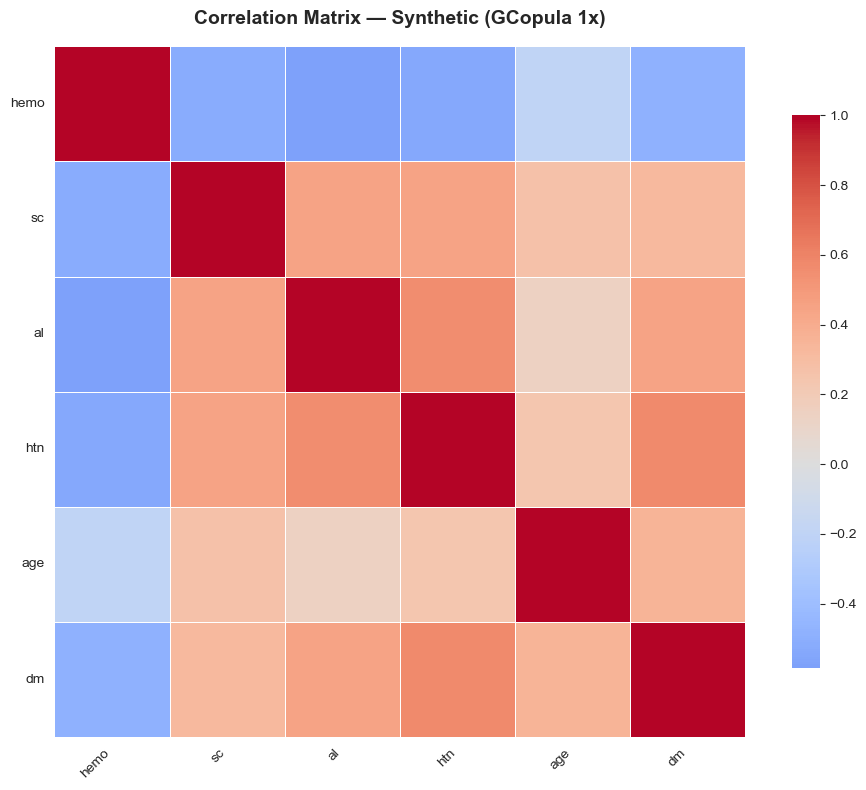

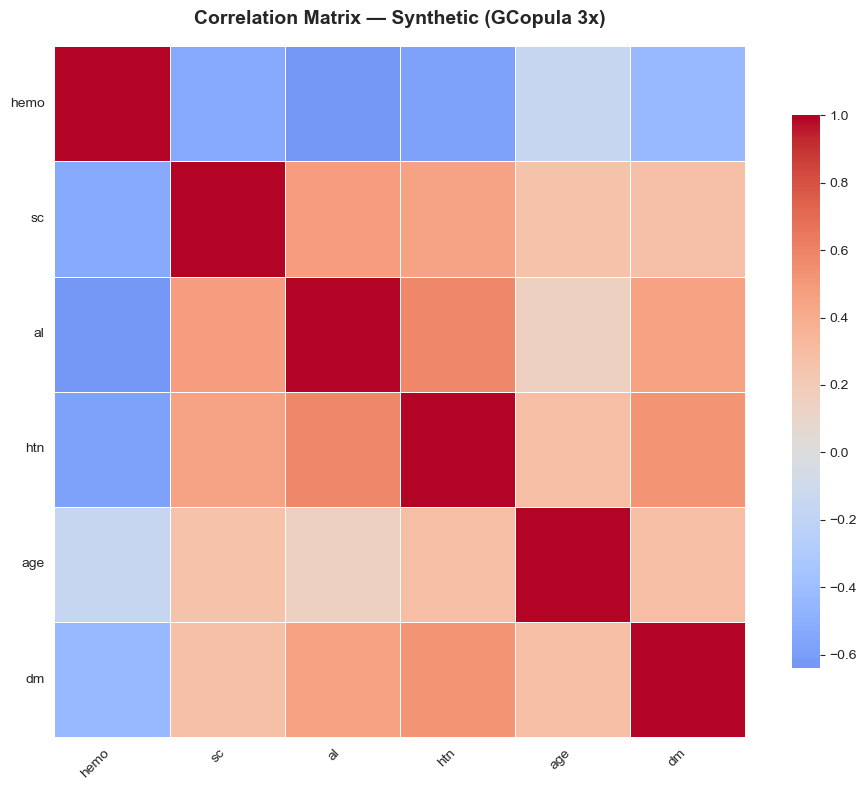

In [5]:
# Load synthetic datasets (GCopula) and ensure aligned canonical columns
synth_path = '../data/synthetic/'
X_synth_1x = pd.read_csv(os.path.join(synth_path, 'X_synth_1x_gcopula_preproc.csv'))
X_synth_3x = pd.read_csv(os.path.join(synth_path, 'X_synth_3x_gcopula_preproc.csv'))

for df_name, df in [('X_synth_1x', X_synth_1x), ('X_synth_3x', X_synth_3x)]:
    missing = [c for c in canonical_features if c not in df.columns]
    if missing:
        raise ValueError(f"{df_name} missing canonical columns: {missing}")

X_synth_1x = X_synth_1x[canonical_features].copy()
X_synth_3x = X_synth_3x[canonical_features].copy()

for col in canonical_features:
    X_synth_1x[col] = pd.to_numeric(X_synth_1x[col], errors='coerce')
    X_synth_3x[col] = pd.to_numeric(X_synth_3x[col], errors='coerce')

X_synth_1x = X_synth_1x.dropna(subset=canonical_features)
X_synth_3x = X_synth_3x.dropna(subset=canonical_features)

print(f"Synthetic 1x shape (after dropping NaNs): {X_synth_1x.shape}")
print(f"Synthetic 3x shape (after dropping NaNs): {X_synth_3x.shape}")

def _plot_corr_heatmap(df: pd.DataFrame, title: str):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        corr,
        annot=False,
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        ax=ax,
    )
    ax.set_title(title, fontsize=14, fontweight='bold', pad=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    return corr

corr_new_real = _plot_corr_heatmap(X_new_real, 'Correlation Matrix — New Real (Imputed Raw)')
corr_synth_1x = _plot_corr_heatmap(X_synth_1x, 'Correlation Matrix — Synthetic (GCopula 1x)')
corr_synth_3x = _plot_corr_heatmap(X_synth_3x, 'Correlation Matrix — Synthetic (GCopula 3x)')

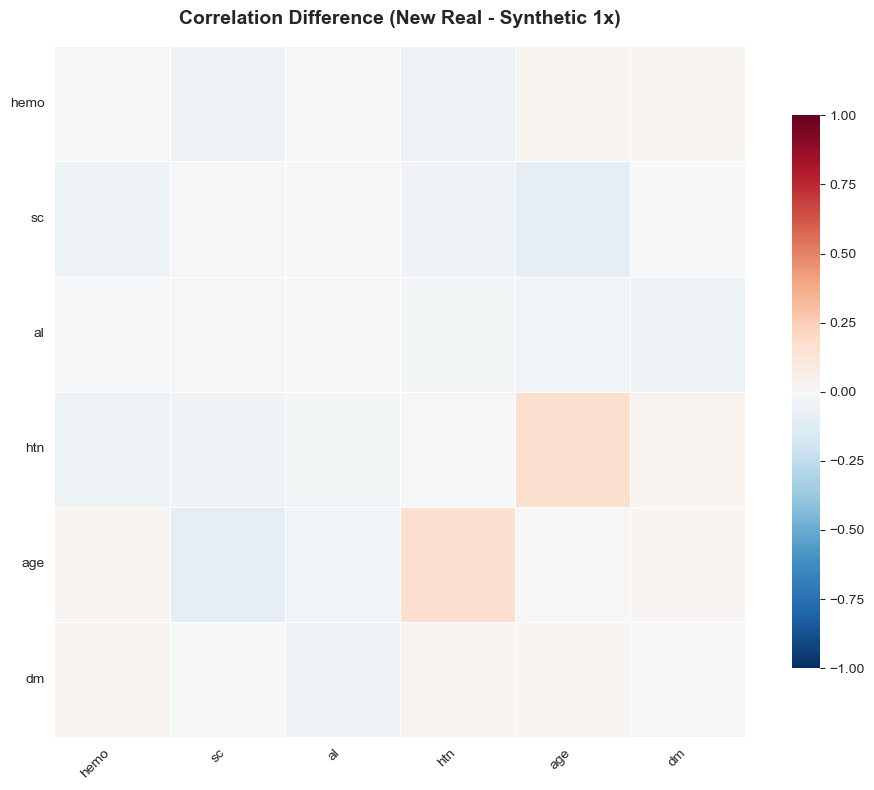

Mean absolute correlation difference: 0.0353
Max correlation difference: 0.1698
Min correlation difference: -0.0941


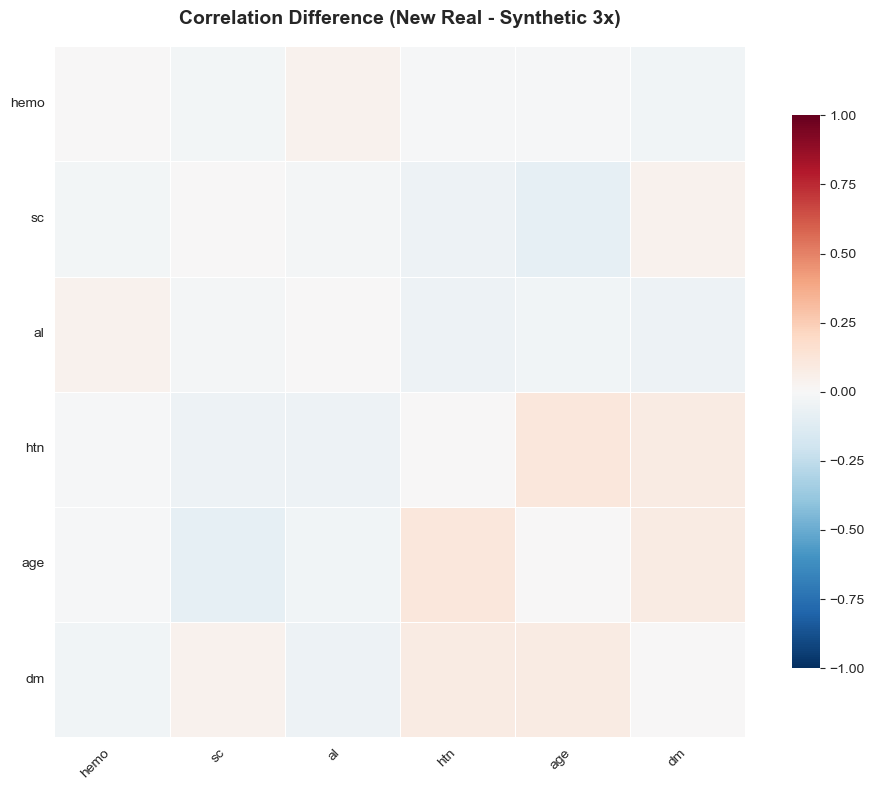

Mean absolute correlation difference: 0.0418
Max correlation difference: 0.1120
Min correlation difference: -0.0906


In [7]:
# Correlation difference plots (New Real - Synthetic)
def _plot_corr_diff_heatmap(corr_a: pd.DataFrame, corr_b: pd.DataFrame, title: str):
    corr_diff = corr_a - corr_b
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        corr_diff,
        annot=False,
        cmap='RdBu_r',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        ax=ax,
        vmin=-1,
        vmax=1,
    )
    ax.set_title(title, fontsize=14, fontweight='bold', pad=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    mean_abs = float(np.abs(corr_diff.values).mean())
    print(f"Mean absolute correlation difference: {mean_abs:.4f}")
    print(f"Max correlation difference: {float(np.nanmax(corr_diff.values)):.4f}")
    print(f"Min correlation difference: {float(np.nanmin(corr_diff.values)):.4f}")
    return corr_diff

corr_diff_new_vs_1x = _plot_corr_diff_heatmap(
    corr_new_real,
    corr_synth_1x,
    'Correlation Difference (New Real - Synthetic 1x)',
)

corr_diff_new_vs_3x = _plot_corr_diff_heatmap(
    corr_new_real,
    corr_synth_3x,
    'Correlation Difference (New Real - Synthetic 3x)',
)

In [9]:
# Difference analysis + compact summary (New Real vs Synthetic)
def _corr_matrix_summary(corr: pd.DataFrame) -> dict:
    vals = corr.values
    upper = vals[np.triu_indices_from(vals, k=1)]
    return {
        'mean_corr_upper': float(np.nanmean(upper)),
        'std_corr_upper': float(np.nanstd(upper)),
        'max_corr_upper': float(np.nanmax(upper)),
        'min_corr_upper': float(np.nanmin(upper)),
    }

def _corr_diff_stats(corr_a: pd.DataFrame, corr_b: pd.DataFrame) -> dict:
    diff = corr_a - corr_b
    abs_diff = np.abs(diff.values)
    upper_abs = abs_diff[np.triu_indices_from(abs_diff, k=1)]
    return {
        'mean_abs_diff_upper': float(np.nanmean(upper_abs)),
        'max_abs_diff_upper': float(np.nanmax(upper_abs)),
    }

rows = []
for label, corr_synth in [('Synthetic 1x', corr_synth_1x), ('Synthetic 3x', corr_synth_3x)]:
    base = {
        'comparison': f'New Real (imputed raw) vs {label}',
        'new_real_n': int(X_new_real.shape[0]),
        'synth_n': int((X_synth_1x if label.endswith('1x') else X_synth_3x).shape[0]),
    }
    base.update({f'new_real_{k}': v for k, v in _corr_matrix_summary(corr_new_real).items()})
    base.update({f'synth_{k}': v for k, v in _corr_matrix_summary(corr_synth).items()})
    base.update(_corr_diff_stats(corr_new_real, corr_synth))
    rows.append(base)

summary_new_vs_synth = pd.DataFrame(rows)

# Print as a readable table and also render as a notebook table
summary_new_vs_synth_rounded = summary_new_vs_synth.copy()
num_cols = summary_new_vs_synth_rounded.select_dtypes(include=[np.number]).columns
summary_new_vs_synth_rounded[num_cols] = summary_new_vs_synth_rounded[num_cols].round(4)

print(summary_new_vs_synth_rounded.to_string(index=False))

out_path = '../results/correlation_analysis_summary_newdata_vs_synth.csv'
summary_new_vs_synth.to_csv(out_path, index=False)
print(f"\nSaved: {out_path}")

# Display table (last expression renders as a formatted table in Jupyter)
summary_new_vs_synth_rounded

                            comparison  new_real_n  synth_n  new_real_mean_corr_upper  new_real_std_corr_upper  new_real_max_corr_upper  new_real_min_corr_upper  synth_mean_corr_upper  synth_std_corr_upper  synth_max_corr_upper  synth_min_corr_upper  mean_abs_diff_upper  max_abs_diff_upper
New Real (imputed raw) vs Synthetic 1x         398      280                    0.0918                     0.43                    0.607                   -0.599                 0.0980                0.4198                0.5683               -0.5851               0.0424              0.1698
New Real (imputed raw) vs Synthetic 3x         398      840                    0.0918                     0.43                    0.607                   -0.599                 0.0937                0.4237                0.5817               -0.6400               0.0501              0.1120

Saved: ../results/correlation_analysis_summary_newdata_vs_synth.csv


,comparison,new_real_n,synth_n,new_real_mean_corr_upper,new_real_std_corr_upper,new_real_max_corr_upper,new_real_min_corr_upper,synth_mean_corr_upper,synth_std_corr_upper,synth_max_corr_upper,synth_min_corr_upper,mean_abs_diff_upper,max_abs_diff_upper
0,New Real (imputed raw) vs Synthetic 1x,398,280,0.0918,0.43,0.607,-0.599,0.0980,0.4198,0.5683,-0.5851,0.0424,0.1698
1,New Real (imputed raw) vs Synthetic 3x,398,840,0.0918,0.43,0.607,-0.599,0.0937,0.4237,0.5817,-0.6400,0.0501,0.1120


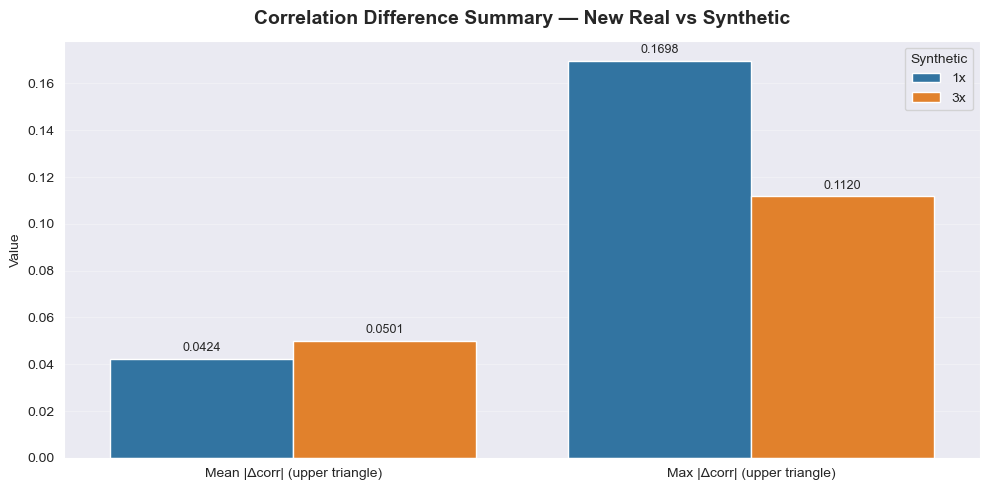

In [10]:
# Plot summary comparison (New Real vs Synthetic 1x vs 3x)
import re

if 'summary_new_vs_synth' not in globals():
    raise NameError("summary_new_vs_synth not found. Run the previous summary cell first.")

plot_df = summary_new_vs_synth.copy()

# Create a short label like '1x' / '3x' from the comparison string
def _short_synth_label(text: str) -> str:
    m = re.search(r"Synthetic\s+(\dx)", str(text))
    return m.group(1) if m else str(text)

plot_df['synth'] = plot_df['comparison'].apply(_short_synth_label)

metrics = ['mean_abs_diff_upper', 'max_abs_diff_upper']
missing_metrics = [m for m in metrics if m not in plot_df.columns]
if missing_metrics:
    raise KeyError(f"Missing expected metrics in summary_new_vs_synth: {missing_metrics}")

melted = plot_df[['synth'] + metrics].melt(id_vars='synth', var_name='metric', value_name='value')

metric_pretty = {
    'mean_abs_diff_upper': 'Mean |Δcorr| (upper triangle)',
    'max_abs_diff_upper': 'Max |Δcorr| (upper triangle)',
}
melted['metric_pretty'] = melted['metric'].map(metric_pretty).fillna(melted['metric'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=melted, x='metric_pretty', y='value', hue='synth', ax=ax)

ax.set_title('Correlation Difference Summary — New Real vs Synthetic', fontsize=14, fontweight='bold', pad=12)
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.legend(title='Synthetic')
ax.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()